In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob


sns.set_style('whitegrid')

In [2]:
metrics_files = glob.glob('**/**.json')
metrics_dicts = []

for file in metrics_files:
    with open(file, 'r') as f:
        if 'roberta' in file:
            print(file)
            metrics_dicts.append(json.load(f))


sst2/run-metrics-roberta-base.json
imdb/run-metrics-roberta-base.json


In [3]:
sst_dic = metrics_dicts[0]
imdb_dic = metrics_dicts[1]

In [4]:
def scale_data(values):
    mn = min(values)
    mx = max(values)

    norm = mx - mn

    scaled_values = [(val - mn)/norm for val in values]
    return scaled_values

In [5]:
dicts = [sst_dic, imdb_dic]
dict_names = ['sst_dic', 'imdb_dic']

In [ ]:
# fig, axs = plt.subplots(3, 2, figsize=(10, 8))
# for i, dic in enumerate(dicts):
#     ax = axs[i//2, i%2]
#     var_dic = dic['variance_metrics']
#     mod_dic = dic['modelling_metrics']
#     ax.plot(var_dic['subset_sizes'], var_dic['r2_values'], marker='o')
#     ax.plot(var_dic['subset_sizes'], mod_dic['test_accuracies'], marker='o')
#     ax.set_title(dict_names[i])
#     ax.set_xlabel('Subset Sizes')
#     ax.set_ylabel('R2 Values & Test accuracies')

# plt.tight_layout()
# plt.show()

[0.8326984841283719, 0.8352032022698168, 0.8361579764252942, 0.8366096429581491, 0.8368361176250638, 0.8369627866439873, 0.8371792298266664, 0.8372673515791407, 0.8374274691398044, 0.8373776422490278]
[0.8276989557407224, 0.8333152116265375, 0.8348582168339008, 0.8358689213385557, 0.8361510750043164, 0.8367256165398215, 0.8371137062918986, 0.8372337593332089, 0.8370893248283274, 0.8374123875909663]


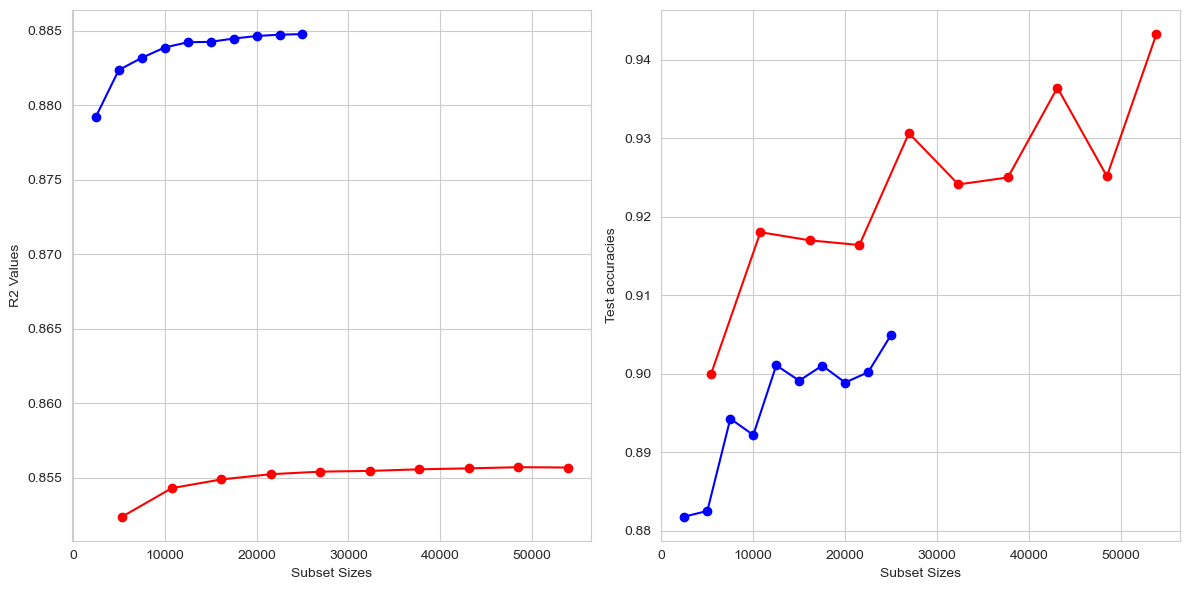

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
color = ["red", "blue", "green", "orange", "purple"]
r2_sst = [0.8524054241498226,
0.8543146034314786,
0.8548986592463816,
0.8552501247229805,
0.8554212882540778,
0.8554720445480518,
0.855579047616206,
0.855641723657603,
0.8557203961090958,
0.8556984372162432]
r2_imdb = [0.8792178685665268,
0.8823680443256628,
0.8831881626120163,
0.8838837621300973,
0.8842333735710758,
0.8842658317820205,
0.8844837098314938,
0.8846558677757893,
0.8847439138470832,
0.8847818042798821]

r2_values = [r2_sst, r2_imdb]

for i, dic in enumerate(dicts):
    var_dic = dic['variance_metrics']
    mod_dic = dic['modelling_metrics']
    print(var_dic['r2_values'])
    axs[0].plot(var_dic['subset_sizes'], r2_values[i], marker="o", color=color[i])
    axs[1].plot(var_dic['subset_sizes'], mod_dic['test_accuracies'], marker="o", color=color[i])

axs[0].set_xlabel('Subset Sizes')
axs[0].set_ylabel('R2 Values')
axs[1].set_xlabel('Subset Sizes')
axs[1].set_ylabel('Test accuracies')

plt.tight_layout()
plt.show()

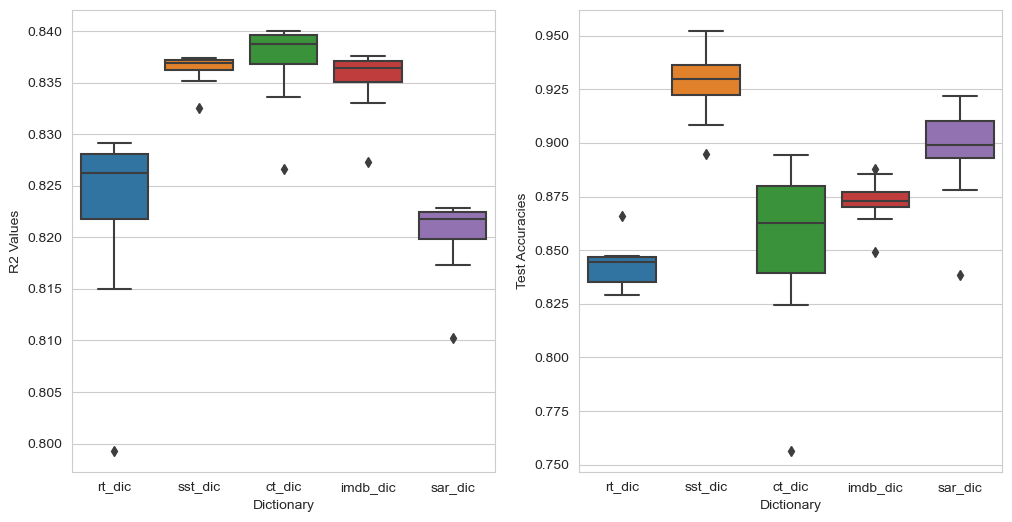

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

data1 = []
data2 = []
for dic, name in zip(dicts, dict_names):
    full_data_len = dic['variance_metrics']['subset_sizes'][-1]
    data1.extend([(name, val, full_data_len) for val in dic['variance_metrics']['r2_values']])
    data2.extend([(name, val, full_data_len) for val in dic['modelling_metrics']['test_accuracies']])
    # data.extend([(name, val*full_data_len) for val in dic['variance_metrics']['r2_values']])
df1 = pd.DataFrame(data1, columns=['Dictionary', 'R2 Values', 'Size'])
df2 = pd.DataFrame(data2, columns=['Dictionary', 'Test Accuracies', 'Size'])
sns.boxplot(x='Dictionary', y='R2 Values', data=df1, ax=axs[0])
sns.boxplot(x='Dictionary', y='Test Accuracies', data=df2, ax=axs[1])
plt.show()

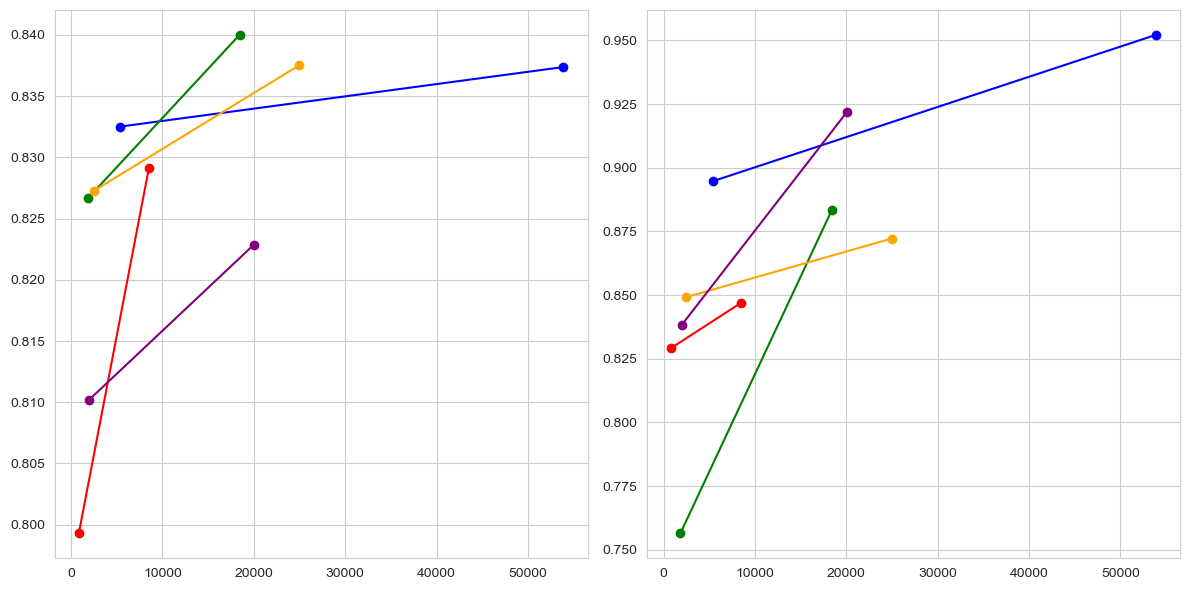

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, dic in enumerate(dicts):
    var_dic = dic['variance_metrics']
    subset_sizes = [var_dic['subset_sizes'][0], var_dic['subset_sizes'][-1]]
    min_max_r2 = [var_dic['r2_values'][0], var_dic['r2_values'][-1]]

    mod_dic = dic['modelling_metrics']
    min_max_acc = [mod_dic['test_accuracies'][0], mod_dic['test_accuracies'][-1]]

    axs[0].plot(subset_sizes, min_max_r2, marker='o', color=color[i])
    axs[1].plot(subset_sizes, min_max_acc, marker='o', color=color[i])
plt.tight_layout()
plt.show()

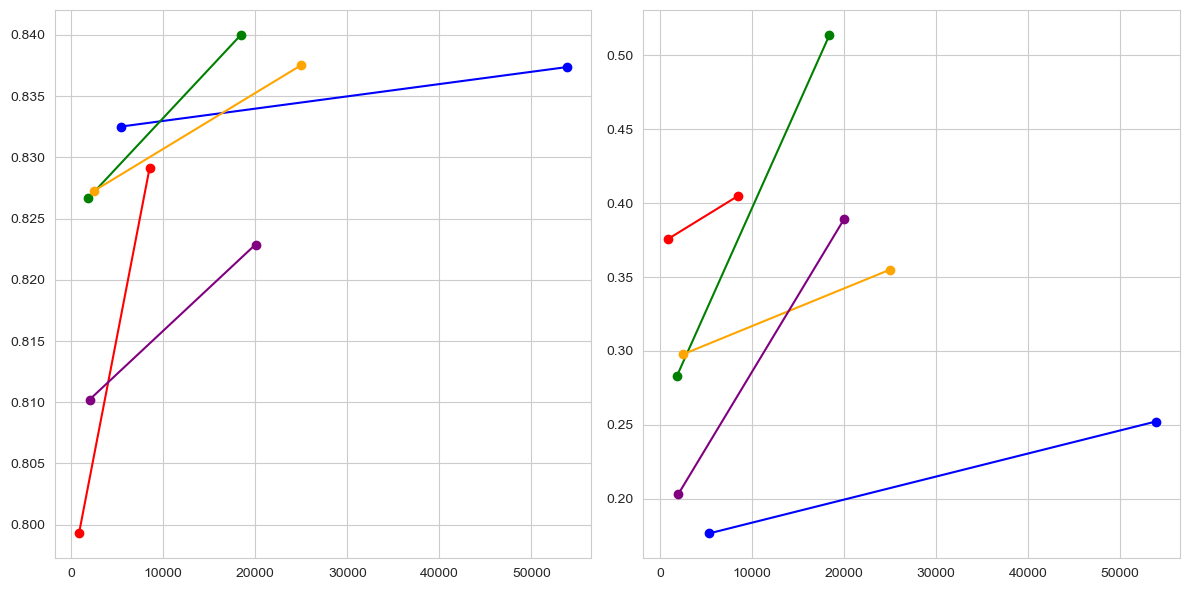

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, dic in enumerate(dicts):
    var_dic = dic['variance_metrics']
    subset_sizes = [var_dic['subset_sizes'][0], var_dic['subset_sizes'][-1]]
    min_max_r2 = [var_dic['r2_values'][0], var_dic['r2_values'][-1]]

    mod_dic = dic['modelling_metrics']
    min_max_acc = [mod_dic['test_losses'][-1], mod_dic['test_losses'][0]]

    axs[0].plot(subset_sizes, min_max_r2, marker='o', color=color[i])
    axs[1].plot(subset_sizes, min_max_acc, marker='o', color=color[i])
plt.tight_layout()
plt.show()